In [5]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from copulas.bivariate import Clayton

np.random.seed(42)

# Simulate stock returns and interest rates
time_steps = 500
stock_returns = np.random.normal(0, 1, time_steps)
interest_rates = 0.5 * stock_returns + np.random.normal(0, 1, time_steps)

data = pd.DataFrame({'Stock Returns': stock_returns, 'Interest Rates': interest_rates})

# Transform to uniform scale
u = stats.rankdata(data['Stock Returns']) / (time_steps + 1)
v = stats.rankdata(data['Interest Rates']) / (time_steps + 1)

# Fit a Clayton copula
copula = Clayton()
copula.fit(pd.DataFrame({'u': u, 'v': v}))

# Simulate future dependencies
u_future = np.random.uniform(size=100)
v_future = copula.inverse_transform(pd.DataFrame({'u': u_future}))

# Transform back to original scale
returns_forecast = np.quantile(data['Stock Returns'], u_future)
rates_forecast = np.quantile(data['Interest Rates'], v_future['v'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=returns_forecast, y=rates_forecast, alpha=0.5)
plt.xlabel("Forecasted Stock Returns")
plt.ylabel("Forecasted Interest Rates")
plt.title("Stock Returns vs. Interest Rates (Copula Forecast)")
plt.savefig("copula_forecast_stock_interest.png")
plt.show()

from copulas.bivariate import StudentT

np.random.seed(42)

# Simulate inflation and unemployment
inflation = np.random.normal(2, 1, time_steps)
unemployment = -0.7 * inflation + np.random.normal(0, 1, time_steps)

data = pd.DataFrame({'Inflation': inflation, 'Unemployment': unemployment})

# Transform to uniform scale
u = stats.rankdata(data['Inflation']) / (time_steps + 1)
v = stats.rankdata(data['Unemployment']) / (time_steps + 1)

# Fit a t-Copula
copula = StudentT()
copula.fit(pd.DataFrame({'u': u, 'v': v}))

# Simulate future dependencies
u_future = np.random.uniform(size=100)
v_future = copula.inverse_transform(pd.DataFrame({'u': u_future}))

# Transform back to original scale
inflation_forecast = np.quantile(data['Inflation'], u_future)
unemployment_forecast = np.quantile(data['Unemployment'], v_future['v'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=inflation_forecast, y=unemployment_forecast, alpha=0.5)
plt.xlabel("Forecasted Inflation")
plt.ylabel("Forecasted Unemployment")
plt.title("Inflation vs. Unemployment (t-Copula Forecast)")
plt.savefig("copula_forecast_inflation_unemployment.png")
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

In [3]:
!pip install copulas

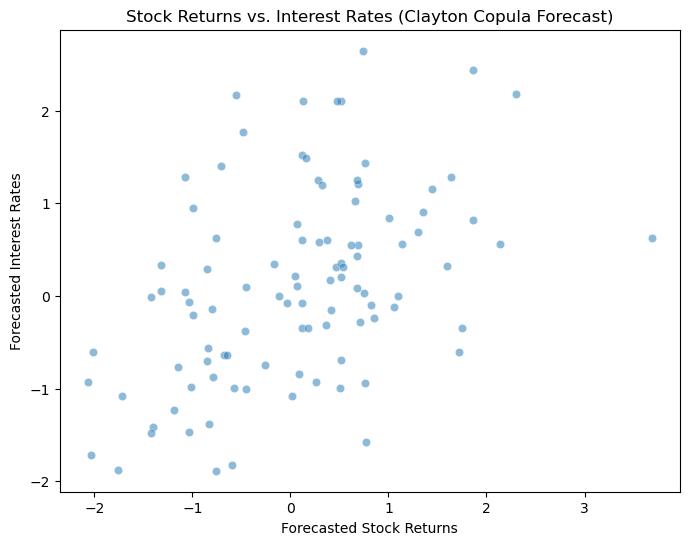

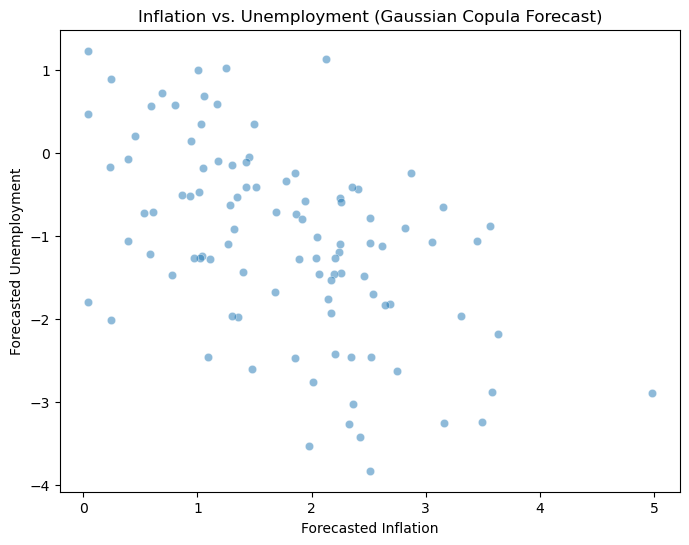

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from copulas.bivariate import Clayton
from copulas.multivariate import GaussianMultivariate # Use Gaussian instead of StudentT

np.random.seed(42)

# Simulate stock returns and interest rates
time_steps = 500
stock_returns = np.random.normal(0, 1, time_steps)
interest_rates = 0.5 * stock_returns + np.random.normal(0, 1, time_steps)

data = pd.DataFrame({'Stock Returns': stock_returns, 'Interest Rates': interest_rates})

# Transform to uniform scale
u = stats.rankdata(data['Stock Returns']) / (time_steps + 1)
v = stats.rankdata(data['Interest Rates']) / (time_steps + 1)

# Fit a Clayton copula
copula = Clayton()
copula.fit(np.column_stack((u, v)))

# Simulate future dependencies
simulated_copula_data = copula.sample(100)

# Transform back to original scale
returns_forecast = np.quantile(data['Stock Returns'], simulated_copula_data[:, 0])
rates_forecast = np.quantile(data['Interest Rates'], simulated_copula_data[:, 1])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=returns_forecast, y=rates_forecast, alpha=0.5)
plt.xlabel("Forecasted Stock Returns")
plt.ylabel("Forecasted Interest Rates")
plt.title("Stock Returns vs. Interest Rates (Clayton Copula Forecast)")
plt.savefig("copula_forecast_stock_interest.png")
plt.show()

np.random.seed(42)

# Simulate inflation and unemployment
inflation = np.random.normal(2, 1, time_steps)
unemployment = -0.7 * inflation + np.random.normal(0, 1, time_steps)

data = pd.DataFrame({'Inflation': inflation, 'Unemployment': unemployment})

# Transform to uniform scale
u = stats.rankdata(data['Inflation']) / (time_steps + 1)
v = stats.rankdata(data['Unemployment']) / (time_steps + 1)

# Use Gaussian Copula (since Student-T is not available)
copula = GaussianMultivariate()
copula.fit(pd.DataFrame({'Inflation': u, 'Unemployment': v}))

# Simulate future dependencies
simulated_copula_data = copula.sample(100).to_numpy()

# Transform back to original scale
inflation_forecast = np.quantile(data['Inflation'], simulated_copula_data[:, 0])
unemployment_forecast = np.quantile(data['Unemployment'], simulated_copula_data[:, 1])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=inflation_forecast, y=unemployment_forecast, alpha=0.5)
plt.xlabel("Forecasted Inflation")
plt.ylabel("Forecasted Unemployment")
plt.title("Inflation vs. Unemployment (Gaussian Copula Forecast)")
plt.savefig("copula_forecast_inflation_unemployment.png")
plt.show()


Failed to get ticker '^GSPC' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^GSPC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
/var/folders/c8/g7bx7g1552g19xn4q4dd583r0000gn/T/ipykernel_27484/2442333921.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_monthly = sp500_daily['Adj Close'].resample('M').last()
/var/folders/c8/g7bx7g1552g19xn4q4dd583r0000gn/T/ipykernel_27484/2442333921.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fedfunds_monthly = fedfunds.resample('M').last()


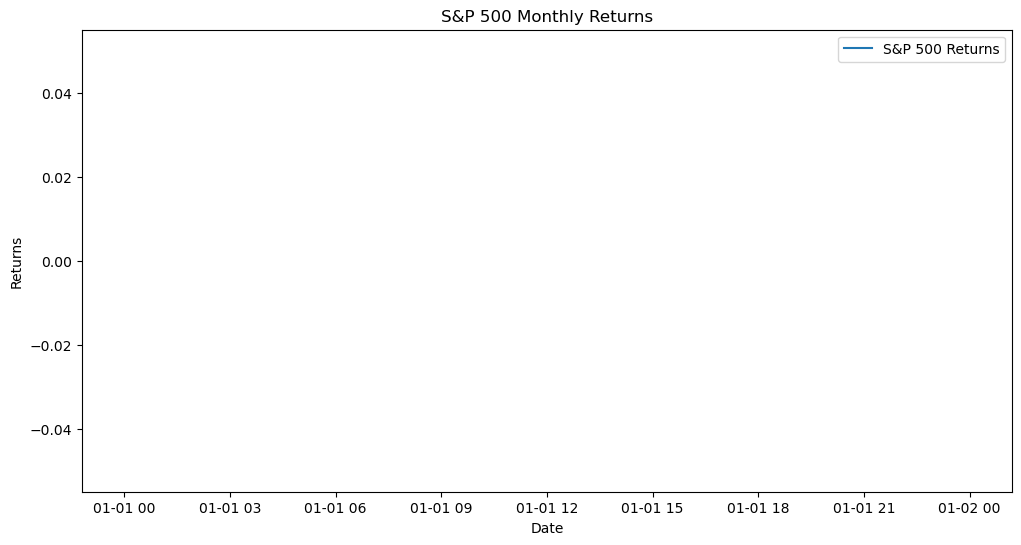

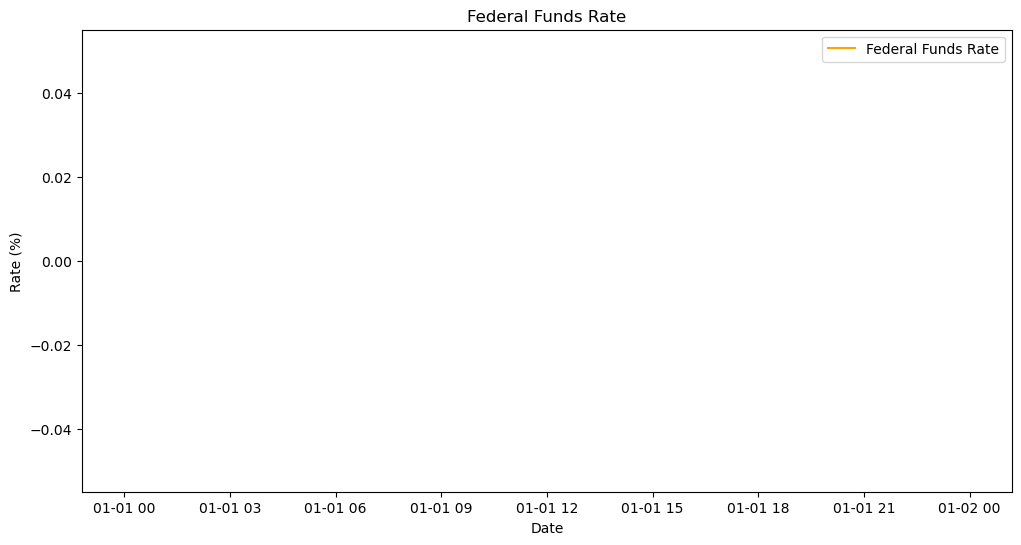

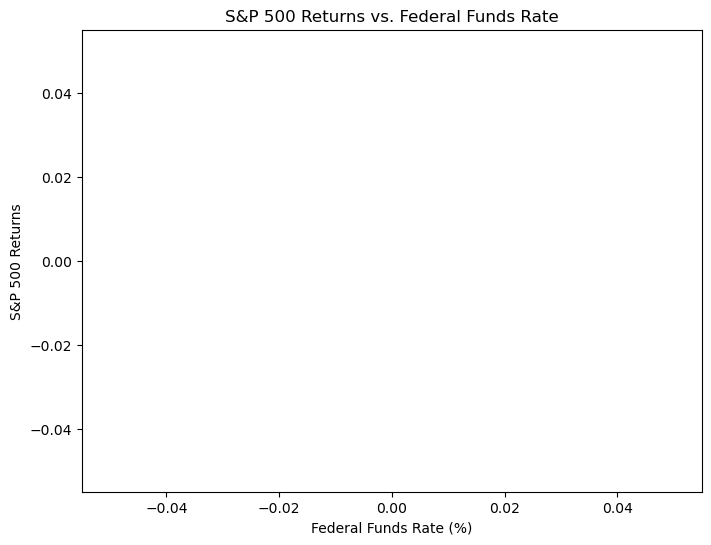

In [17]:

import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

start_date = '1994-01-01'
end_date = '2019-09-01'

# Download daily data for S&P 500
sp500_daily = yf.download('^GSPC', start=start_date, end=end_date, interval='1d')

# Resample to monthly frequency, taking the last available price of each month
sp500_monthly = sp500_daily['Adj Close'].resample('M').last()

# Calculate monthly returns
sp500_returns = sp500_monthly.pct_change().dropna()

# Retrieve FEDFUNDS data from FRED
fedfunds = web.DataReader('FEDFUNDS', 'fred', start_date, end_date)

# Convert FEDFUNDS to monthly frequency (it is typically already in monthly frequency)
fedfunds_monthly = fedfunds.resample('M').last()

# Merge the two datasets on the date index
data = pd.merge(sp500_returns, fedfunds_monthly, left_index=True, right_index=True, how='inner')

# Rename columns for clarity
data.columns = ['S&P 500 Returns', 'Federal Funds Rate']

# Plot S&P 500 Returns
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['S&P 500 Returns'], label='S&P 500 Returns')
plt.title('S&P 500 Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plot Federal Funds Rate
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Federal Funds Rate'], label='Federal Funds Rate', color='orange')
plt.title('Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()

# Scatter plot to show relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Federal Funds Rate', y='S&P 500 Returns', data=data)
plt.title('S&P 500 Returns vs. Federal Funds Rate')
plt.xlabel('Federal Funds Rate (%)')
plt.ylabel('S&P 500 Returns')
plt.show()


In [37]:
import requests
start_date = '1994-01-01'
end_date = '2019-09-01'
api_key = 'ac4993dbc2582d8203f81034cc621131'  # Replace with your actual FMP API key

# Define the FMP API endpoint
fmp_url = f'https://financialmodelingprep.com/api/v3/historical-price-full/%5EGev?from={start_date}&to={end_date}&apikey={api_key}'

# Fetch the data
response = requests.get(fmp_url)
data = response.json()

# Convert to DataFrame
sp500_daily = pd.DataFrame(data['GSPC'])

# Set the date as the DataFrame index
sp500_daily['date'] = pd.to_datetime(sp500_daily['date'])
sp500_daily.set_index('date', inplace=True)

# Sort the DataFrame by date
sp500_daily.sort_index(inplace=True)

# Resample to monthly frequency, taking the last available price of each month
sp500_monthly = sp500_daily['close'].resample('M').last()

# Calculate monthly returns
sp500_returns = sp500_monthly.pct_change().dropna()

# Retrieve FEDFUNDS data from FRED
fedfunds = web.DataReader('FEDFUNDS', 'fred', start_date, end_date)

# Convert FEDFUNDS to monthly frequency (it is typically already in monthly frequency)
fedfunds_monthly = fedfunds.resample('M').last()

# Merge the two datasets on the date index
data = pd.merge(sp500_returns, fedfunds_monthly, left_index=True, right_index=True, how='inner')

# Rename columns for clarity
data.columns = ['S&P 500 Returns', 'Federal Funds Rate']

# Plot S&P 500 Returns
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['S&P 500 Returns'], label='S&P 500 Returns')
plt.title('S&P 500 Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plot Federal Funds Rate
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Federal Funds Rate'], label='Federal Funds Rate', color='orange')
plt.title('Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()

# Scatter plot to show relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Federal Funds Rate', y='S&P 500 Returns', data=data)
plt.title('S&P 500 Returns vs. Federal Funds Rate')
plt.xlabel('Federal Funds Rate (%)')
plt.ylabel('S&P 500 Returns')
plt.show()

KeyError: 'GSPC'

In [39]:
data

{'Error Message': 'Free plan is limited to US stocks only please visit our subscription page to upgrade your plan at https://site.financialmodelingprep.com/developer/docs/pricing'}